<a href="https://colab.research.google.com/github/SorayaFrancoLopez/Pisa_analisis_ML/blob/main/GRAFICOS_RRSS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# vamos a descargar las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

In [ ]:
# vamos a cargar el csv /Users/mizaelov/Documents/DC2023/TFM/CSV_TFM/porcentaje_de_niños_que_disponen_de_movil_por_edades_en_españa_en_2019.csv
df = pd.read_csv('/content/drive/MyDrive/porcentaje_de_niños_que_disponen_de_movil_por_edades_en_españa_en_2019.csv', sep=';')
df.head()

,Año,Periodo,Parámetro,Niños que disponen de teléfono móvil
0,2019,Año,10 años,"22,3"
1,2019,Año,11 años,"38,1"
2,2019,Año,12 años,"63,9"
3,2019,Año,13 años,84
4,2019,Año,14 años,"92,5"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# vamos a ver los valores nulos
df.isnull().sum()


Año                                      4
Periodo                                 14
Parámetro                               14
Niños que disponen de teléfono móvil    14
dtype: int64

In [ ]:
# eliminamos los valores nulos de la columna Parámetro
df = df.dropna(subset=['Parámetro'])
df.head()

,Año,Periodo,Parámetro,Niños que disponen de teléfono móvil
0,2019,Año,10 años,"22,3"
1,2019,Año,11 años,"38,1"
2,2019,Año,12 años,"63,9"
3,2019,Año,13 años,84
4,2019,Año,14 años,"92,5"


In [ ]:
# miramos nuevamente que no haya valores nulos
df.isnull().sum()

Año                                     0
Periodo                                 0
Parámetro                               0
Niños que disponen de teléfono móvil    0
dtype: int64

In [ ]:
# vamos a quitar la palabra años de la columna Parámetro
df['Parámetro'] = df['Parámetro'].str.replace(' años', '')

# Cambiamos el nombre de la columna Parámetro por Edad
df.rename(columns={'Parámetro':'Edad'}, inplace=True)

# Cambiamos la columna Edad a tipo int
df['Edad'] = df['Edad'].astype(int)

# Cambiamos la columna Niños que disponende teléfono móvil a tipo porcentaje
df['Niños que disponen de teléfono móvil'] = df['Niños que disponen de teléfono móvil'].str.replace(',', '.')
df['Niños que disponen de teléfono móvil'] = df['Niños que disponen de teléfono móvil'].astype(float)

# Cambiamos el nombre de la columna Niños que disponen de teléfono móvil por Porcentaje
df.rename(columns={'Niños que disponen de teléfono móvil':'Porcentaje'}, inplace=True)

df


<ipython-input-12-921e8a4751cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parámetro'] = df['Parámetro'].str.replace(' años', '')
<ipython-input-12-921e8a4751cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Parámetro':'Edad'}, inplace=True)
<ipython-input-12-921e8a4751cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,Año,Periodo,Edad,Porcentaje
0,2019,Año,10,22.3
1,2019,Año,11,38.1
2,2019,Año,12,63.9
3,2019,Año,13,84.0
4,2019,Año,14,92.5
5,2019,Año,15,93.8


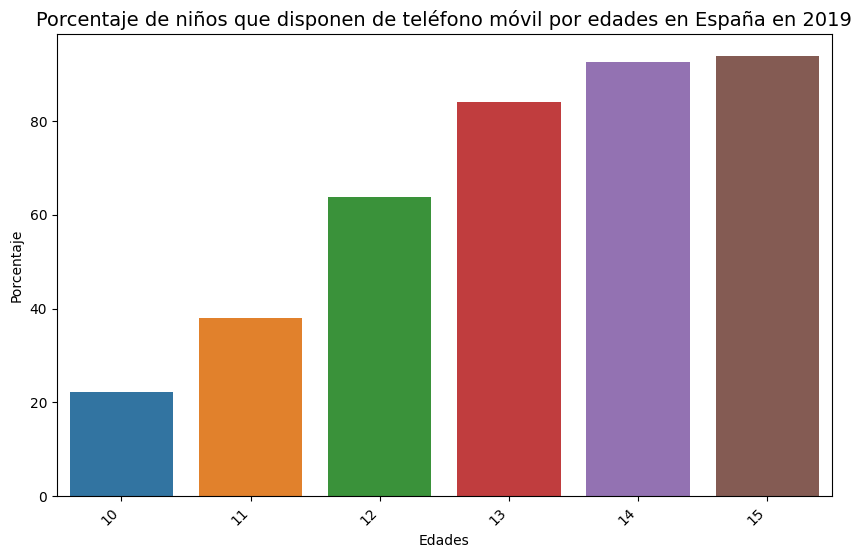

In [ ]:
# Vamos a graficar la columna Parámetro con la columna Niños que disponen de teléfono móvil, con Seaborn
# como titulo de la grafica vamos a poner: Porcentaje de niños que disponen de teléfono móvil por edades en España en 2019
# la letra sera Arial 14 para el titulo y el resto en Arial 10

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Edad', y='Porcentaje', data=df)
ax.set_title('Porcentaje de niños que disponen de teléfono móvil por edades en España en 2019', fontsize=14, fontname='Arial')
ax.set_xlabel('Edades', fontsize=10, fontname='Arial')
ax.set_ylabel('Porcentaje', fontsize=10, fontname='Arial')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


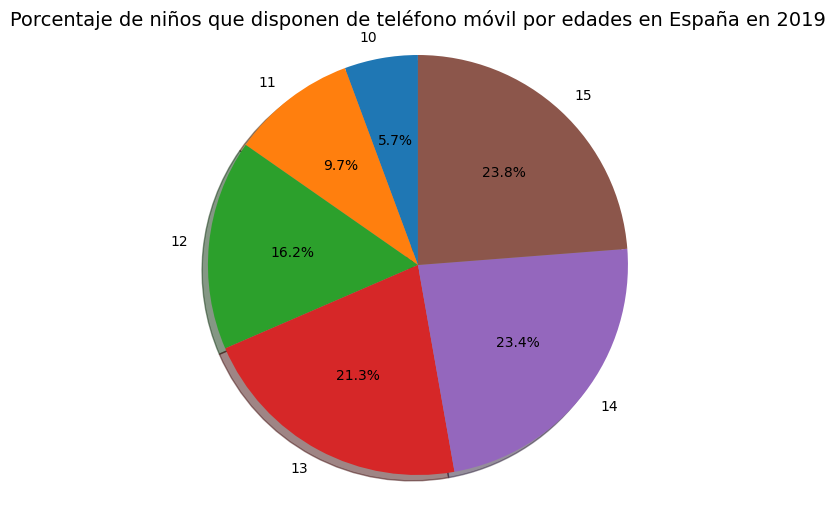

In [ ]:
# ahora vamos a hacer lo mismo pero con un grafico de tartas con matplotlib
# como titulo de la grafica vamos a poner: Porcentaje de niños que disponen de teléfono móvil por edades en España en 2019
# la letra sera Arial 14 para el titulo y el resto en Arial 10

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(df['Porcentaje'], labels=df['Edad'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de niños que disponen de teléfono móvil por edades en España en 2019', fontsize=14, fontname='Arial')
plt.show()

In [ ]:
# Ahora vamos a cargar el CSV /Users/mizaelov/Documents/DC2023/TFM/CSV_TFM/uso_de_redes_sociales_en_jovenes_de_16_a_30_años_y_adultos_de_46_a_65_años.csv

df1 = pd.read_csv('/content/drive/MyDrive/uso_de_redes_sociales_en_jovenes_de_16_a_30_años_y_adultos_de_46_a_65_años.csv', sep=';')
df1.head()


,Año,Periodo,Parámetro,De 16 a 30 años,De 46 a 65 años
0,2019,Año,21 Buttons,1.0,0.0
1,2019,Año,Facebook,81.0,86.0
2,2019,Año,Instagram,67.0,37.0
3,2019,Año,LinkeDin,12.0,22.0
4,2019,Año,Peoople,0.0,0.0


In [ ]:
# buscamos los valores nulos
df1.isnull().sum()


Año                 6
Periodo            23
Parámetro          23
De 16 a 30 años    23
De 46 a 65 años    23
dtype: int64

In [ ]:
# Eliminamos los valores nulos de la columna Parámetro
df1 = df1.dropna(subset=['Parámetro'])
df1.head()

,Año,Periodo,Parámetro,De 16 a 30 años,De 46 a 65 años
0,2019,Año,21 Buttons,1.0,0.0
1,2019,Año,Facebook,81.0,86.0
2,2019,Año,Instagram,67.0,37.0
3,2019,Año,LinkeDin,12.0,22.0
4,2019,Año,Peoople,0.0,0.0


In [ ]:
# Confirmamos que no haya valores nulos
df1.isnull().sum()

# Cambiamos el nombre de la columna Parámetro por Red Social
df1.rename(columns={'Parámetro':'Red Social'}, inplace=True)


<ipython-input-20-4fc5f6381181>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Parámetro':'Red Social'}, inplace=True)


In [ ]:
# hacemos un sort values de la columna De 16 a 30 años
df1.sort_values(by=['De 16 a 30 años'], inplace=True, ascending=False)
df1.head()

<ipython-input-21-e0c0ebaaa0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=['De 16 a 30 años'], inplace=True, ascending=False)


,Año,Periodo,Red Social,De 16 a 30 años,De 46 a 65 años
15,2019,Año,WhatsApp,84.0,87.0
1,2019,Año,Facebook,81.0,86.0
16,2019,Año,YouTube,73.0,54.0
2,2019,Año,Instagram,67.0,37.0
13,2019,Año,Twitter,45.0,39.0


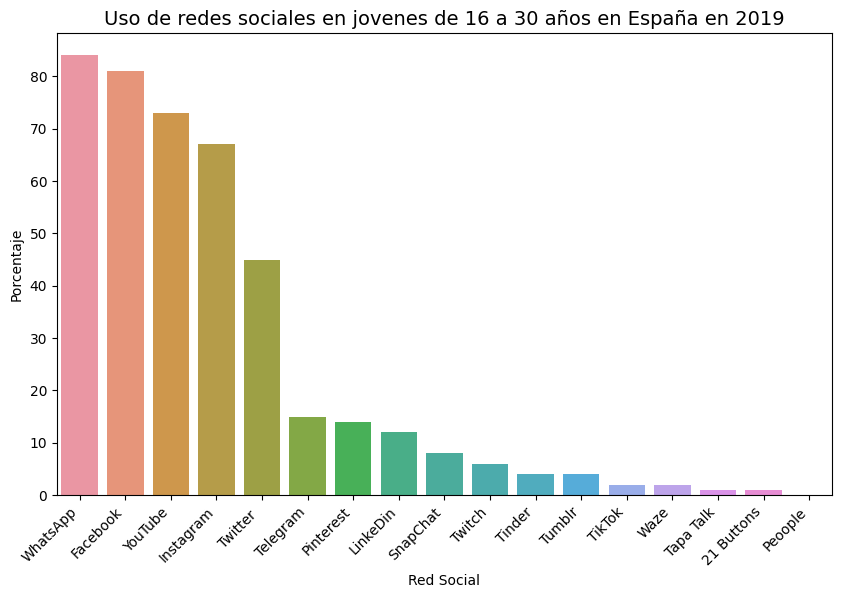

In [ ]:
# Vamos a hacer dos graficos con Seaborn, uno para los jovenes de 16 a 30 años y otro para los adultos de 46 a 65 años
# como titulo de la grafica vamos a poner: Uso de redes sociales en jovenes de 16 a 30 años en España en 2019
# la letra sera Arial 14 para el titulo y el resto en Arial 10
# el eje X sera Red Social y el eje Y sera Porcentaje

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Red Social', y='De 16 a 30 años', data=df1)
ax.set_title('Uso de redes sociales en jovenes de 16 a 30 años en España en 2019', fontsize=14, fontname='Arial')
ax.set_xlabel('Red Social', fontsize=10, fontname='Arial')
ax.set_ylabel('Porcentaje', fontsize=10, fontname='Arial')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# ahora hacemos un sort values de la columna De 46 a 65 años
df1.sort_values(by=['De 46 a 65 años'], inplace=True, ascending=False)
df1.head()

,Año,Periodo,Red Social,De 16 a 30 años,De 46 a 65 años
15,2019,Año,WhatsApp,84.0,87.0
1,2019,Año,Facebook,81.0,86.0
16,2019,Año,YouTube,73.0,54.0
13,2019,Año,Twitter,45.0,39.0
2,2019,Año,Instagram,67.0,37.0


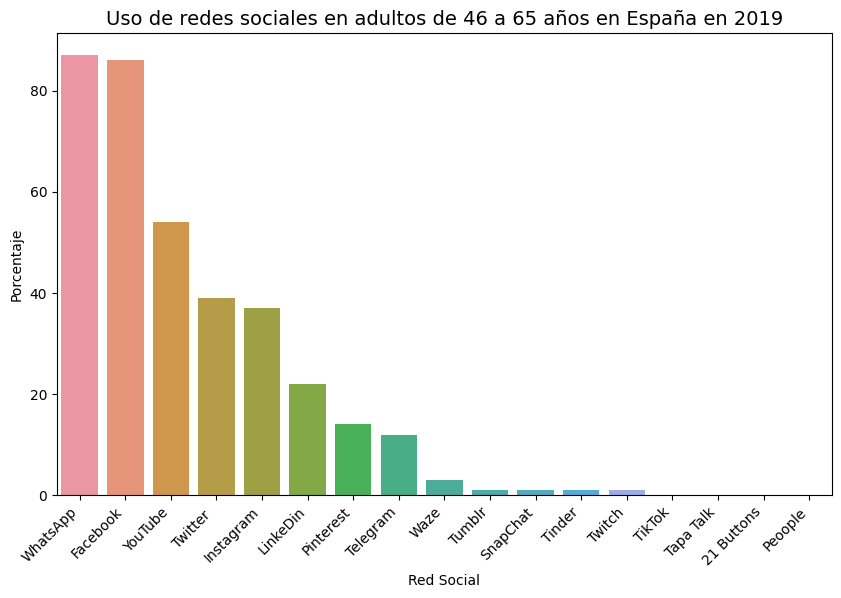

In [ ]:
# hacemos el mismo grafico pero con la columna de 46 a 65 años
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Red Social', y='De 46 a 65 años', data=df1)
ax.set_title('Uso de redes sociales en adultos de 46 a 65 años en España en 2019', fontsize=14, fontname='Arial')
ax.set_xlabel('Red Social', fontsize=10, fontname='Arial')
ax.set_ylabel('Porcentaje', fontsize=10, fontname='Arial')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
# ahora vamos a cargar el csv /Users/mizaelov/Documents/DC2023/TFM/CSV_TFM/lo mas visto en tiktok temas.csv

df2 = pd.read_csv('/content/drive/MyDrive/lo mas visto en tiktok temas.csv', sep=';')
df2.head()

,Categoría,Popularidad por búsqueda de etiquetas
0,Entretenimiento,535.000 millones
1,Baile,181.000 millones
2,Broma,79.000 millones
3,Fitness / Deportes,57.000 millones
4,Renovación del hogar / Bricolaje,39.000 millones


In [ ]:
# buscamos los valores nulos en el csv
df2.isnull().sum()

Categoría                                0
Popularidad por búsqueda de etiquetas    0
dtype: int64

In [ ]:
# cambiamos el nombre de la columna Popularidad por búsqueda de etiquetas por Millones de búsquedas
df2.rename(columns={'Popularidad por búsqueda de etiquetas':'Millones de búsquedas'}, inplace=True)

# Eliminamos la palabra millones de los valores de la columna Millones de búsquedas
df2['Millones de búsquedas'] = df2['Millones de búsquedas'].str.replace(' millones', '')

# Cambiamos la columna Millones de búsquedas a tipo int
df2['Millones de búsquedas'] = df2['Millones de búsquedas'].astype(float)

df2

,Categoría,Millones de búsquedas
0,Entretenimiento,535.0
1,Baile,181.0
2,Broma,79.0
3,Fitness / Deportes,57.0
4,Renovación del hogar / Bricolaje,39.0
5,Belleza/ Cuidado de la piel,33.0
6,Moda,27.0
7,Recetas / Cocina,18.0
8,Trucos / Consejos de vida,13.0
9,Mascotas,10.0


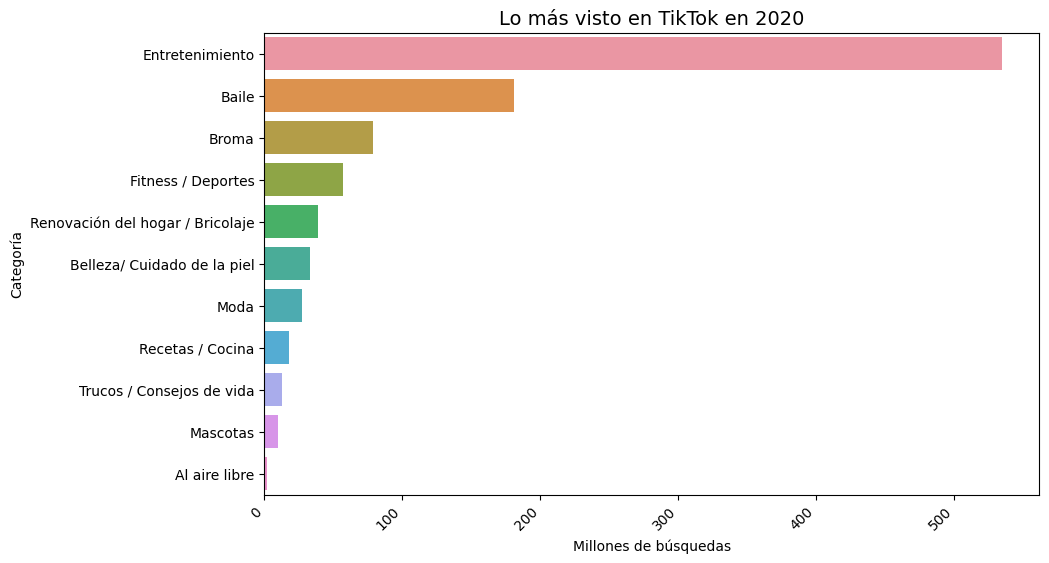

In [ ]:
# Vamos a hacer un grafico con Seaborn con la columna Categoría y la columna Millones de búsquedas
# como titulo de la grafica vamos a poner: Lo más visto en TikTok en 2020
# la letra sera Arial 14 para el titulo y el resto en Arial 10
# el eje X sera Millones de búsquedas y el eje Y sera Categoría

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Millones de búsquedas', y='Categoría', data=df2)
ax.set_title('Lo más visto en TikTok en 2020', fontsize=14, fontname='Arial')
ax.set_xlabel('Millones de búsquedas', fontsize=10, fontname='Arial')
ax.set_ylabel('Categoría', fontsize=10, fontname='Arial')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()
